In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron
)
from pu_learning import (
    ClassDepLossMultilayerPerceptron,
    HardBoostrappingMultilayerPerceptron
)
from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [3]:
X, y = datasets.make_circles(n_samples=800, noise=0.2, factor=.3, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

Using [ 1.  1.]
Epoch: 0001 cost= 1.403703213
Epoch: 0011 cost= 1.091049314
Epoch: 0021 cost= 0.586992025
Epoch: 0031 cost= 0.294295743
Epoch: 0041 cost= 0.228366312
Epoch: 0051 cost= 0.215788294
Epoch: 0061 cost= 0.197636383
Epoch: 0071 cost= 0.191873431
Epoch: 0081 cost= 0.187352795
Epoch: 0091 cost= 0.188047886
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

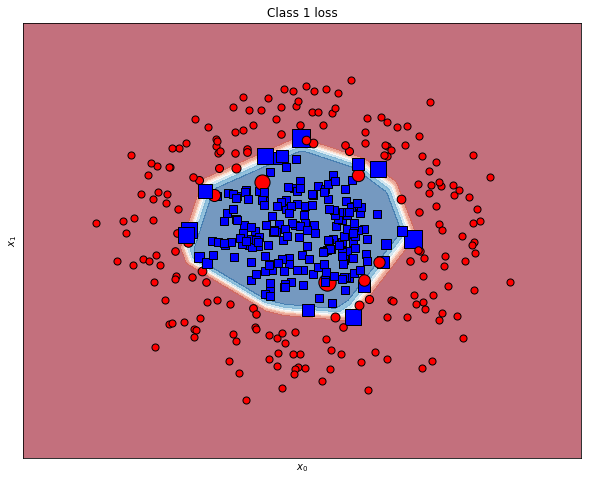

In [4]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          alpha=0,
                          epochs=100,
                          verbose=True)
fit_and_plot(X_train, Y_train, mp, "loss")

# PU setup

In [5]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

Using [ 1.  1.]
Epoch: 0001 cost= 1.872387797
Epoch: 0011 cost= 1.135673434
Epoch: 0021 cost= 1.083171651
Epoch: 0031 cost= 1.068544656
Epoch: 0041 cost= 1.055887759
Epoch: 0051 cost= 1.040603638
Epoch: 0061 cost= 1.023394033
Epoch: 0071 cost= 1.006285906
Epoch: 0081 cost= 0.988909900
Epoch: 0091 cost= 0.974102423
Using [ 1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

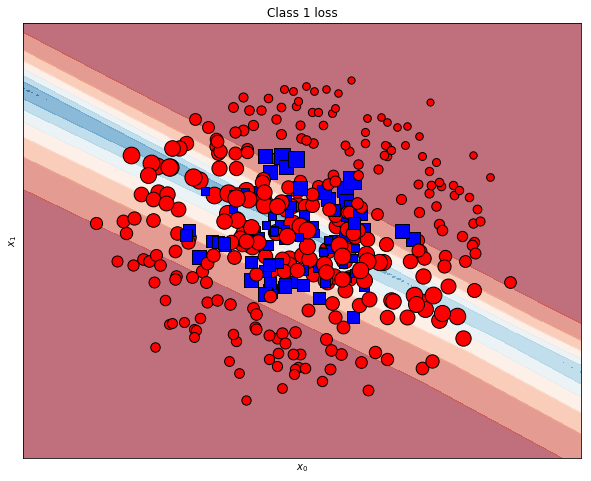

In [6]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, "loss")

### balanced learning

Using [ 1.          3.23157895]
Epoch: 0001 cost= 1.700116962
Epoch: 0011 cost= 1.540035129
Epoch: 0021 cost= 1.457204729
Epoch: 0031 cost= 1.340233237
Epoch: 0041 cost= 1.232083499
Epoch: 0051 cost= 1.166380793
Epoch: 0061 cost= 1.133056402
Epoch: 0071 cost= 1.111335665
Epoch: 0081 cost= 1.091802984
Epoch: 0091 cost= 1.080636114
Using [ 1.          3.23157895]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

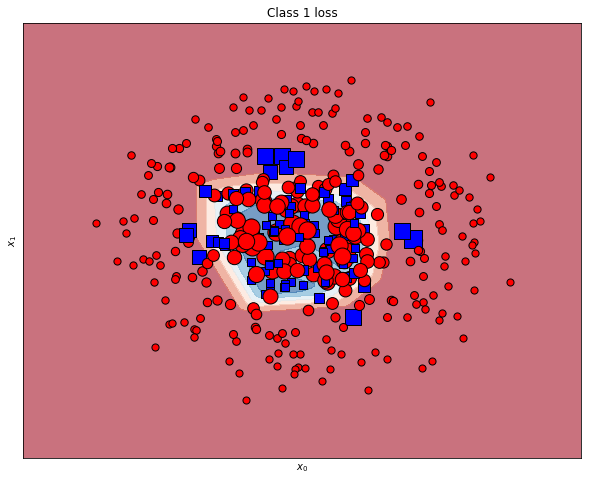

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, "loss")

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 2.039591610
Epoch: 0011 cost= 1.936061978
Epoch: 0021 cost= 1.875858247
Epoch: 0031 cost= 1.800275773
Epoch: 0041 cost= 1.720108777
Epoch: 0051 cost= 1.628942668
Epoch: 0061 cost= 1.528993487
Epoch: 0071 cost= 1.444556475
Epoch: 0081 cost= 1.402474076
Epoch: 0091 cost= 1.381408125
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

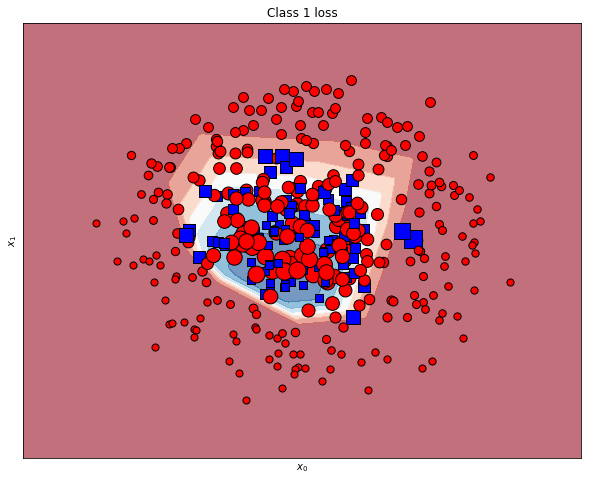

In [8]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, "loss")

Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]
Epoch: 0001 cost= 2.467863142
Epoch: 0011 cost= 1.524779856
Epoch: 0021 cost= 1.157303929
Epoch: 0031 cost= 1.081607848
Epoch: 0041 cost= 1.047352746
Epoch: 0051 cost= 1.020214781
Epoch: 0061 cost= 0.994658440
Epoch: 0071 cost= 0.964284107
Epoch: 0081 cost= 0.920157537
Epoch: 0091 cost= 0.856048554
Epoch: 0101 cost= 0.787549958
Epoch: 0111 cost= 0.737722397
Epoch: 0121 cost= 0.706245512
Epoch: 0131 cost= 0.685798943
Epoch: 0141 cost= 0.669964492
Epoch: 0151 cost= 0.655343294
Epoch: 0161 cost= 0.638956070
Epoch: 0171 cost= 0.622493535
Epoch: 0181 cost= 0.607190385
Epoch: 0191 cost= 0.592820376
Using [ 1.          3.23157895]
Re-weighing to [ 1.          6.46315789]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

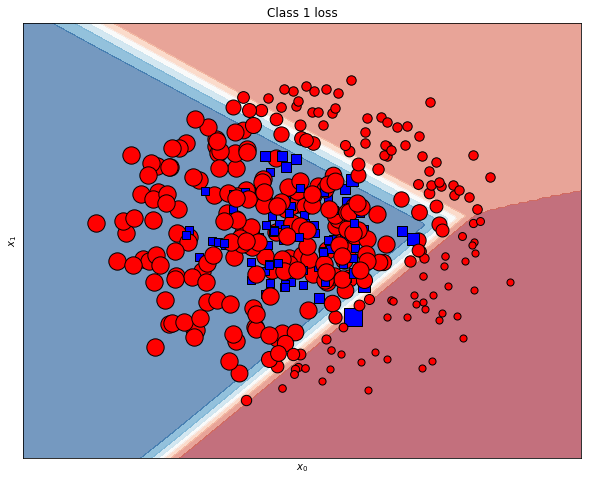

In [15]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=2e-3,
                          alpha=0,
                          epochs=200,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, "loss")

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.555468112')
('Epoch:', '0011', 'cost=', '0.421239808')
('Epoch:', '0021', 'cost=', '0.418509126')
('Epoch:', '0031', 'cost=', '0.418054782')
('Epoch:', '0041', 'cost=', '0.417856358')
('Epoch:', '0051', 'cost=', '0.417747475')
('Epoch:', '0061', 'cost=', '0.417682163')
('Epoch:', '0071', 'cost=', '0.417639516')
('Epoch:', '0081', 'cost=', '0.417610914')
('Epoch:', '0091', 'cost=', '0.417590141')
('Epoch:', '0101', 'cost=', '0.417574912')
('Epoch:', '0111', 'cost=', '0.417563349')
('Epoch:', '0121', 'cost=', '0.417554408')
('Epoch:', '0131', 'cost=', '0.417547144')
('Epoch:', '0141', 'cost=', '0.417541288')
('Epoch:', '0151', 'cost=', '0.417536482')
('Epoch:', '0161', 'cost=', '0.417532511')
('Epoch:', '0171', 'cost=', '0.417529300')
('Epoch:', '0181', 'cost=', '0.417526506')
('Epoch:', '0191', 'cost=', '0.417524122')
('Using class_weight', array([  1.        ,  10.44310249]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

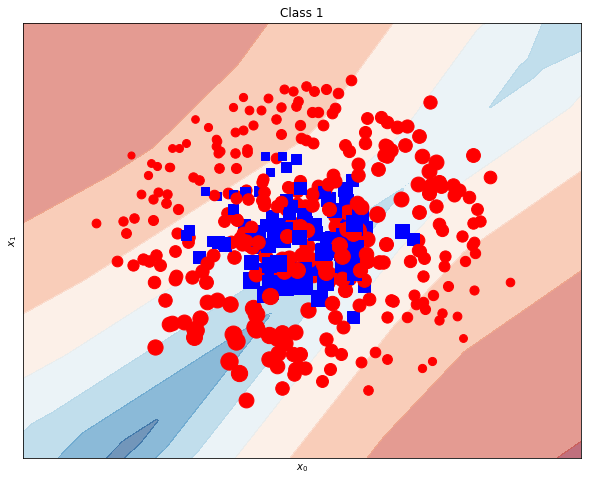

In [8]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp, "gradient")

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '0.667100877')
('Epoch:', '0011', 'cost=', '0.643706195')
('Epoch:', '0021', 'cost=', '0.591685444')
('Epoch:', '0031', 'cost=', '0.532862775')
('Epoch:', '0041', 'cost=', '0.504239865')
('Epoch:', '0051', 'cost=', '0.490545064')
('Epoch:', '0061', 'cost=', '0.483803146')
('Epoch:', '0071', 'cost=', '0.479790650')
('Epoch:', '0081', 'cost=', '0.476753406')
('Epoch:', '0091', 'cost=', '0.474351555')
('Epoch:', '0101', 'cost=', '0.472553588')
('Epoch:', '0111', 'cost=', '0.471224986')
('Epoch:', '0121', 'cost=', '0.470040821')
('Epoch:', '0131', 'cost=', '0.469028860')
('Epoch:', '0141', 'cost=', '0.468365647')
('Epoch:', '0151', 'cost=', '0.467602722')
('Epoch:', '0161', 'cost=', '0.466798514')
('Epoch:', '0171', 'cost=', '0.466180265')
('Epoch:', '0181', 'cost=', '0.465653986')
('Epoch:', '0191', 'cost=', '0.465227000')
('Using class_weight', array([  1.        ,  20.88620499]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

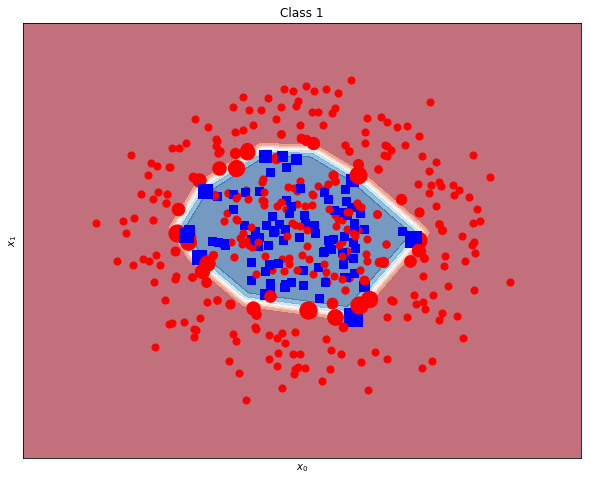

In [9]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          class_weight=[0.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp, "gradient")